In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Helper functions for logarithmic quantization and bitshift operations
def log2_quantize(x, method="floor", fractional_bits=3):
    """
    Quantizes the log2 representation of x.

    Args: 
        x: Input tensor.
        method: 'floor' or 'round' for quantization.
        fractional_bits: Number of fractional bits for rounding.

    Returns:
        Quantized log2 representation of x.
    """
    log2_x = tf.math.log(x + 1e-8) / tf.math.log(2.0)  # Avoid log(0)
    if method == "floor":
        return tf.floor(log2_x)
    elif method == "round":
        integer_part = tf.floor(log2_x)
        fractional_part = log2_x - integer_part
        threshold = (2**fractional_bits - 1) / (2**fractional_bits)
        return integer_part + tf.cast(fractional_part >= threshold, tf.float32)
    else:
        raise ValueError("Invalid quantization method. Choose 'floor' or 'round'.")

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocess the data
# Reshape the data to include a channel dimension (1 for grayscale images)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Apply log2 quantization to input data
x_train = log2_quantize(x_train, method="floor")
x_test = log2_quantize(x_test, method="floor")

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Define the Modified CNN Model with Logarithmic Quantization
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Second Convolutional Block
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Third Convolutional Block
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# 6. Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\prabh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 129s 298ms/step - accuracy: 0.8574 - loss: 0.4781 - val_accuracy: 0.9795 - val_loss: 0.0748
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 129s 305ms/step - accuracy: 0.9774 - loss: 0.0737 - val_accuracy: 0.9875 - val_loss: 0.0426
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 130s 308ms/step - accuracy: 0.9843 - loss: 0.0482 - val_accuracy: 0.9878 - val_loss: 0.0463
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 130s 307ms/step - accuracy: 0.9870 - loss: 0.0406 - val_accuracy: 0.9902 - val_loss: 0.0389
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 129s 306ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9915 - val_loss: 0.0295
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 131s 310ms/step - accuracy: 0.9891 - loss: 0.0330 - val_accuracy: 0.9900 - val_loss: 0.0368
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 125s 297ms/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9910 - val_loss: 0.0309
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 127s 302ms/step - accuracy: 0.9907 -

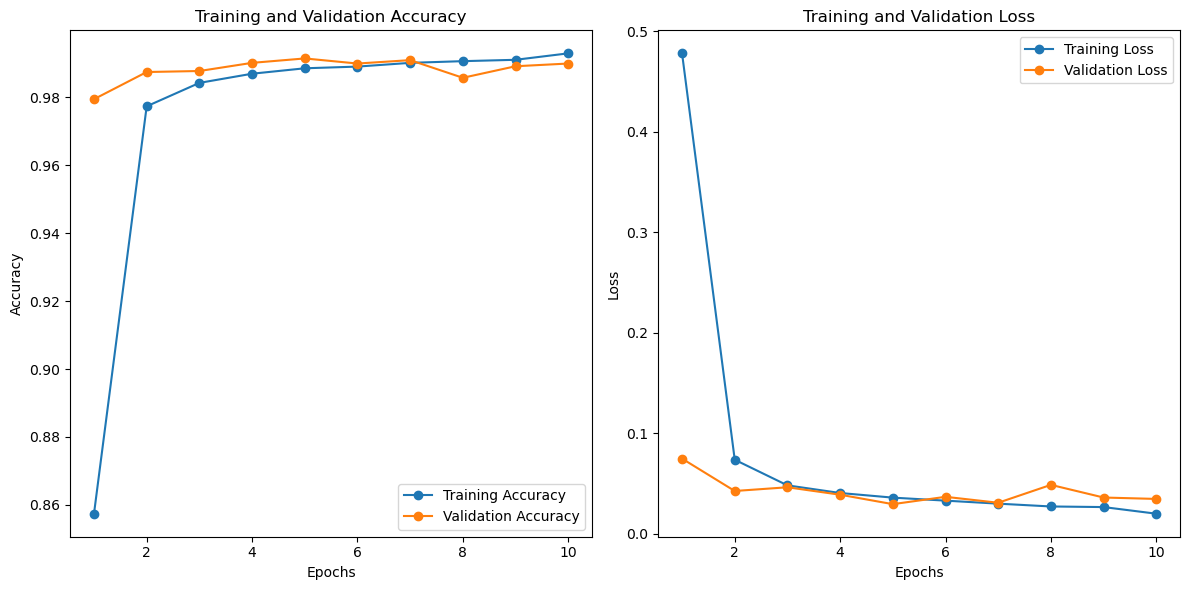

In [1]:
import matplotlib.pyplot as plt

accuracy = [0.8574, 0.9774, 0.9843, 0.9870, 0.9886, 0.9891, 0.9902, 0.9907, 0.9911, 0.9930]
val_accuracy = [0.9795, 0.9875, 0.9878, 0.9902, 0.9915, 0.9900, 0.9910, 0.9858, 0.9892, 0.9900]
loss = [0.4781, 0.0737, 0.0482, 0.0406, 0.0360, 0.0330, 0.0300, 0.0272, 0.0266, 0.0200]
val_loss = [0.0748, 0.0426, 0.0463, 0.0389, 0.0295, 0.0368, 0.0309, 0.0487, 0.0361, 0.0347]

epochs = range(1, 11)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
